In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nanmedian, NaN
from scipy.stats import mode
df = pd.read_csv('StudentsPerformance.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:


# df.hist()
df['math_score'].mean()
bachelor_degree = df[(df['parental_level_of_education'] == "bachelor's degree") & (df['math_score'])]
some_college = df[(df['parental_level_of_education'] == "some college") & (df['math_score'])]
master_degree = df[(df['parental_level_of_education'] == "master's degree") & (df['math_score'])]
associate_degree = df[(df['parental_level_of_education'] == "associate's degree") & (df['math_score'])]
associate_degree
high_school = df[(df['parental_level_of_education'] == "high school") & (df['math_score'])]
high_school
# df['parental_level_of_education']

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
12,female,group B,high school,standard,none,65,81,73
16,male,group C,high school,standard,none,88,89,86
20,male,group D,high school,standard,none,66,69,63
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62
996,male,group C,high school,free/reduced,none,62,55,55


In [3]:
df["gender"].mode()

0    female
dtype: object

Mostly took women 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.head(4)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [31]:
average_test_scores_by_level = df.groupby('parental_level_of_education')['math_score','reading_score','writing_score'].mean()
average_test_scores_by_level

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


The average test scores of all degrees

In [51]:
average_test_scores_by_level.min()

math_score       62.137755
reading_score    64.704082
writing_score    62.448980
dtype: float64

In [21]:
average_test_scores_by_level.max()

math_score       69.745763
reading_score    75.372881
writing_score    75.677966
dtype: float64

In [19]:
average_test_scores_by_level.std()

math_score       3.134879
reading_score    3.909281
writing_score    4.984544
dtype: float64

array([[<AxesSubplot:title={'center':'math_score'}>,
        <AxesSubplot:title={'center':'reading_score'}>],
       [<AxesSubplot:title={'center':'writing_score'}>, <AxesSubplot:>]],
      dtype=object)

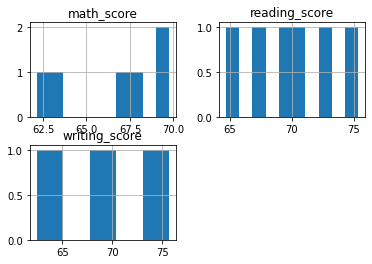

In [20]:
average_test_scores_by_level.hist()

In [22]:
df.head(2)


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [28]:
average_test_scores_by_race = df.groupby('race/ethnicity')['math_score','reading_score','writing_score'].mean()
average_test_scores_by_race

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,math_score,reading_score,writing_score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [47]:
average_test_scores_by_race.corrwith(average_test_scores_by_level)
average_scores = df[['math_score', 'reading_score', 'writing_score']].mean()
average_scores


math_score       66.089
reading_score    69.169
writing_score    68.054
dtype: float64

In [41]:
average_test_scores_by_food = df.groupby('lunch')['math_score','reading_score','writing_score'].mean()
average_test_scores_by_food

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [48]:
average_test_scores_by_food.corrwith(average_test_scores_by_race)

math_score      NaN
reading_score   NaN
writing_score   NaN
dtype: float64

In [50]:
df.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
math_gender = df[['gender','math_score']]
numpy_math_sex = math_gender.to_numpy()
numpy_math_sex


array([['female', 72],
       ['female', 69],
       ['female', 90],
       ...,
       ['female', 59],
       ['female', 68],
       ['female', 77]], dtype=object)

<AxesSubplot:xlabel='parental_level_of_education', ylabel='count'>

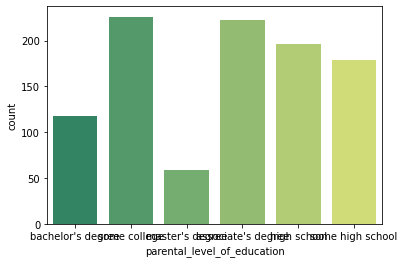

In [70]:
sns.countplot(x="parental_level_of_education", palette="summer", data=df)

In [71]:
df.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


<AxesSubplot:xlabel='gender', ylabel='math_score'>

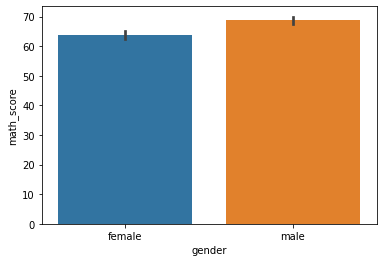

In [77]:
sns.barplot(y="math_score",x = "gender", data = df)

<AxesSubplot:xlabel='lunch', ylabel='math_score'>

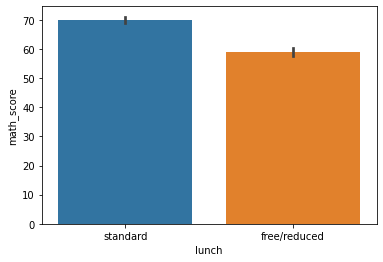

In [78]:
sns.barplot(y="math_score",x = "lunch", data = df)

<AxesSubplot:>

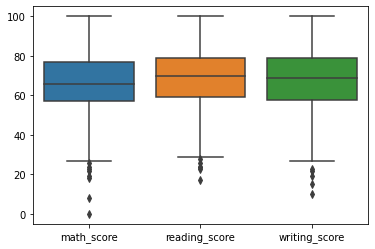

In [80]:
sns.boxplot(orient = 'v', data = df)

In [81]:
df.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


<AxesSubplot:xlabel='math_score', ylabel='test_preparation_course'>

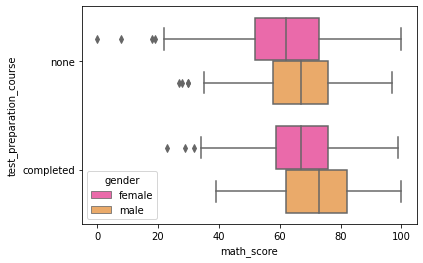

In [90]:
sns.boxplot(x = 'math_score', y = 'test_preparation_course',hue = 'gender', data = df,palette = 'spring')

In [96]:
df_corr = df.corr()
df_corr

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


<AxesSubplot:>

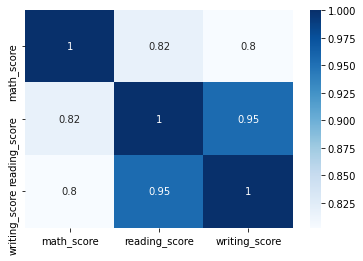

In [97]:
sns.heatmap(df_corr , annot = True, cmap = 'Blues')

This correlation heatmap indication is when students read more their writing skills better as well.

In [3]:
df.head(10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
bachelor_degree = df[(df['parental_level_of_education'] == "bachelor's degree") & (df['math_score'])]
some_college = df[(df['parental_level_of_education'] == "some college") & (df['math_score'])]
master_degree = df[(df['parental_level_of_education'] == "master's degree") & (df['math_score'])]
associate_degree = df[(df['parental_level_of_education'] == "associate's degree") & (df['math_score'])]
high_school = df[(df['parental_level_of_education'] == "high school") & (df['math_score'])]
bachelor_degree

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
27,female,group C,bachelor's degree,standard,none,67,69,75
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72
90,female,group C,bachelor's degree,standard,none,65,72,74
99,female,group D,bachelor's degree,standard,none,65,67,62
114,female,group E,bachelor's degree,standard,completed,99,100,100
...,...,...,...,...,...,...,...,...
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100
908,female,group C,bachelor's degree,free/reduced,none,67,75,72
913,female,group C,bachelor's degree,free/reduced,completed,47,62,66
969,female,group B,bachelor's degree,standard,none,75,84,80


In [ ]:
probability_of_bach_greater_70 = 
bachelor_degree = df[(df['parental_level_of_education'] == "bachelor's degree") & (df['math_score'])]
